<a href="https://colab.research.google.com/github/sedwna/Salary-Dataset-Simple-linear-regression-with-pytorch/blob/main/src/Simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [190]:
# @title import library

import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [191]:
# @title import data
salary = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')
salary

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891
6,2.5,48266
7,2.9,56642
8,3.0,60150
9,3.2,54445


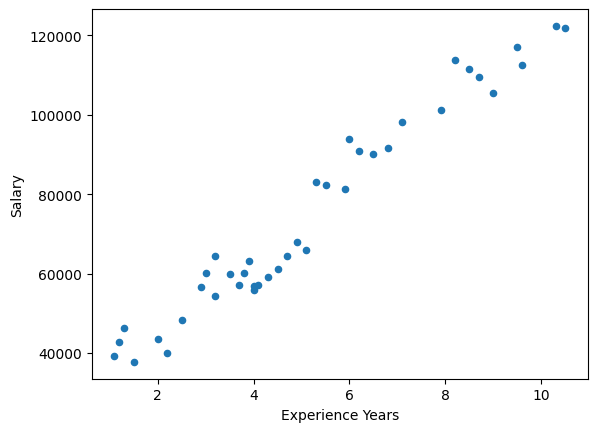

In [192]:
# @title Experience Years vs Salary

salary.plot(kind='scatter', x='Experience Years', y='Salary')
plt.show()

In [193]:
# @title split train and test data
X = salary['Experience Years'].values # .values for dont show number in left
y = salary['Salary'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28,), (12,), (28,), (12,))

In [194]:
# @title reshape 1D to 2D array
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((28, 1), (12, 1), (28, 1), (12, 1))

In [195]:
# @title preprocessing train data with standard scaler

x_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)

y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train)


In [196]:
# @title preprocessing test data with standard scaler

X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

In [197]:
y_scaler.inverse_transform(y_test)

array([[98273.],
       [82200.],
       [46205.],
       [54445.],
       [39891.],
       [91738.],
       [56957.],
       [42774.],
       [83088.],
       [67938.],
       [64500.],
       [57189.]])

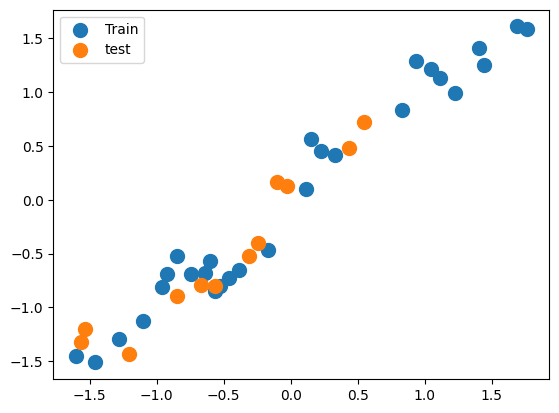

In [198]:
# @title plot X_train, y_train, X_test, y_test

plt.scatter(X_train,y_train, s = 100)
plt.scatter(X_test,y_test, s=100)

plt.legend(['Train','test'])
plt.show()

In [199]:
X_train = torch.tensor(X_train,dtype=torch.float32)
y_train = torch.tensor(y_train,dtype=torch.float32)

X_test = torch.tensor(X_test,dtype=torch.float32)
y_test = torch.tensor(y_test,dtype=torch.float32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


(torch.Size([28, 1]),
 torch.Size([12, 1]),
 torch.Size([28, 1]),
 torch.Size([12, 1]))

In [200]:
class LinearRegression():
  def __init__(self):
    self.X = torch.randn(1)
    self.y = torch.randn(1)
    self.y_hat = torch.randn(1)
    self.theta0 = torch.randn(1)
    self.theta1 = torch.randn(1)
    self.eta = 0.5

  def __call__(self,x):
    pass

  def __repr__(self):
    return 'Linear Regression class'

  def mse(self):
    self.loss = torch.mean((self.y_hat - self.y)**2)
    print(f'loss {self.loss:.4f}');


  def fit(self,x,y,n=100,eta=0.5):
    self.eta = eta
    self.X = x
    self.y = y
    for i in range(n):
      self.linear_regression()
      self.mse()
      self.calc_gradient()
      self.update()

  def calc_gradient(self):
    error = self.y_hat - self.y
    self.grad_theta0 = 2 * torch.mean(self.X * error)
    self.grad_theta1 = 2 * torch.mean(error)

  def update(self):
    self.theta0 = self.theta0 - self.eta * self.grad_theta0
    self.theta1 = self.theta1 - self.eta * self.grad_theta1

  def linear_regression(self):
        self.y_hat = self.X * self.theta0 + self.theta1

  def test(self,x,y):
    self.X = x
    self.y = y
    self.linear_regression()
    self.mse()
    return self.y_hat


In [201]:
model = LinearRegression()

In [202]:
X_train.shape,y_train.shape

(torch.Size([28, 1]), torch.Size([28, 1]))

In [203]:
model.fit(X_train,y_train,n=20,eta=0.1)

loss 0.5696
loss 0.3786
loss 0.2564
loss 0.1781
loss 0.1281
loss 0.0960
loss 0.0755
loss 0.0624
loss 0.0540
loss 0.0486
loss 0.0452
loss 0.0430
loss 0.0416
loss 0.0407
loss 0.0401
loss 0.0397
loss 0.0395
loss 0.0393
loss 0.0392
loss 0.0392


In [204]:
model.theta0, model.theta1

(tensor([0.9851]), tensor([-0.0069]))

In [205]:
X_test.shape, y_test.shape

(torch.Size([12, 1]), torch.Size([12, 1]))

In [206]:
y_hat = model.test(X_test,y_test)

loss 0.0403


In [207]:
y_scaler.inverse_transform(y_hat)

array([[93108.62304854],
       [77795.3778654 ],
       [37598.11030812],
       [55782.58898204],
       [46211.81047731],
       [90237.38804191],
       [63439.21243259],
       [36641.03358947],
       [75881.22230593],
       [72052.91098488],
       [70138.75512225],
       [60567.97904286]])

In [208]:
y_scaler.inverse_transform(y_test)

array([[98272.99947624],
       [82200.00004836],
       [46205.00013149],
       [54444.99955119],
       [39891.00111107],
       [91737.9997216 ],
       [56957.00013406],
       [42773.99900132],
       [83087.9999403 ],
       [67937.99963171],
       [64499.99978788],
       [57188.9997708 ]])

In [210]:
x_scaler.inverse_transform(X_test)

array([[7.10000006],
       [5.5       ],
       [1.2999999 ],
       [3.20000001],
       [2.19999995],
       [6.79999996],
       [4.00000005],
       [1.1999999 ],
       [5.3       ],
       [4.89999998],
       [4.70000001],
       [3.70000004]])

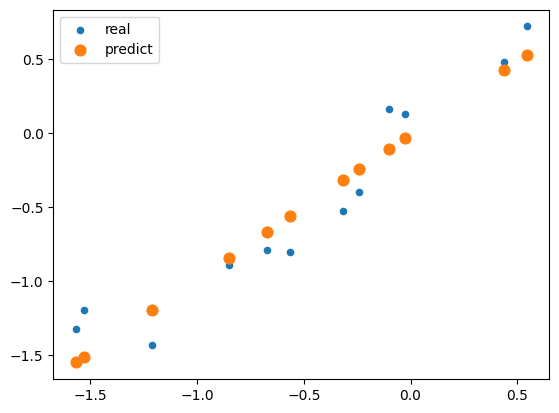

In [213]:
plt.scatter(X_test,y_test, s= 20)
plt.scatter(X_test,y_hat, s =60)

plt.legend(['real','predict'])
plt.show()